## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_study_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_data_study_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = mouse_data_study_results_df["Mouse ID"].value_counts()
count_mice = len(number_mice)
print(count_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplication_of_mice = mouse_data_study_results_df.loc[mouse_data_study_results_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(duplication_of_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#",:]" means ALL rows
duplicated_mouse_data = mouse_data_study_results_df.loc[mouse_data_study_results_df["Mouse ID"]=="g989",:]
duplicated_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = mouse_data_study_results_df[mouse_data_study_results_df["Mouse ID"].isin(duplication_of_mice)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
cleaning_data = clean_mouse_data_df["Mouse ID"].value_counts()
drop_duplication = len(cleaning_data)
print(drop_duplication)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_of_regimen = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_of_regimen

median_of_regimen = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_of_regimen 

variance_of_regimen = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variance_of_regimen

std_of_regimen = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_of_regimen

sem_of_regimen = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_of_regimen


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Assemble the resulting series into a single summary dataframe.
summary_regimen_stats_df = pd.DataFrame({"Mean": mean_of_regimen,
                                        "Median": median_of_regimen,
                                        "Variance": variance_of_regimen,
                                        "Standard Deviation": std_of_regimen,
                                        "SEM":sem_of_regimen})
summary_regimen_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_regimen_df = clean_mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var","std","sem"])
agg_summary_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Measurements Taken on Each Drug Regimen')

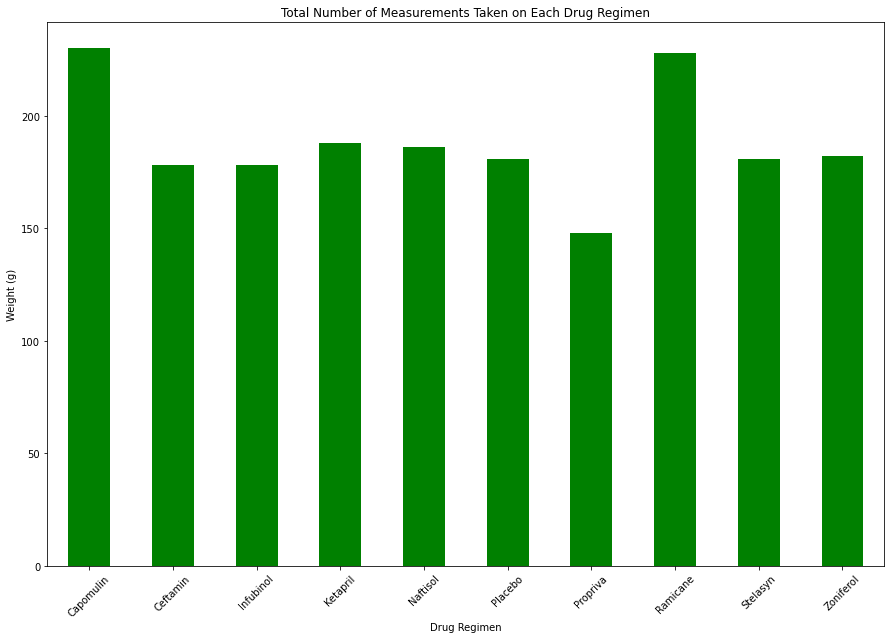

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurement_count_df = clean_mouse_data_df.groupby("Drug Regimen")["Weight (g)"].count()
measurement_count_df

pandas_plot = measurement_count_df.plot.bar(color="g", figsize=(15,10), rot=45)
measurement_count_df

plt.xlabel("Drug Regimen")
plt.ylabel("Weight (g)")
plt.title("Total Number of Measurements Taken on Each Drug Regimen")

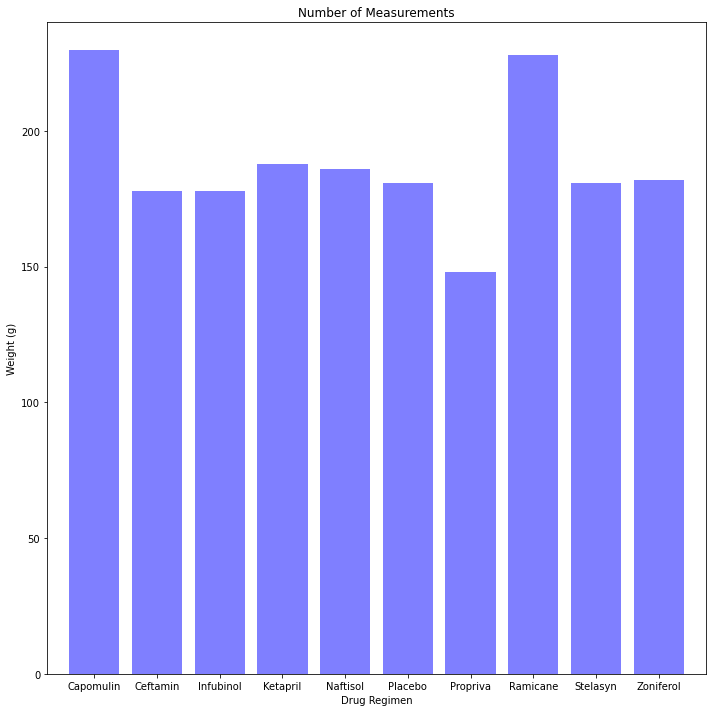

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(measurement_count_df))
fig1, ax1 = plt.subplots(figsize=(10,10))
pyplot_graph = plt.bar(x_axis, measurement_count_df, color='b', alpha=0.5, align="center")
measurement_count_df

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(measurement_count_df)+10)

plt.title("Number of Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Weight (g)")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

plt.tight_layout()
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_grouping = clean_mouse_data_df.groupby(["Mouse ID","Sex"])
gender_grouping

gender_distr_df = pd.DataFrame(gender_grouping.size())

# DataFrame that counts the total counts of females and males
gender_of_mouse = pd.DataFrame(gender_distr_df.groupby(["Sex"]).count())
gender_of_mouse.columns = ["Total Count"]

# Format for Percentage of female and male mice
gender_of_mouse["Sex Percentage"] = (100*(gender_of_mouse["Total Count"]/gender_of_mouse["Total Count"].sum()))

gender_of_mouse["Sex Percentage"] = gender_of_mouse["Sex Percentage"]

gender_of_mouse

,Total Count,Sex Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


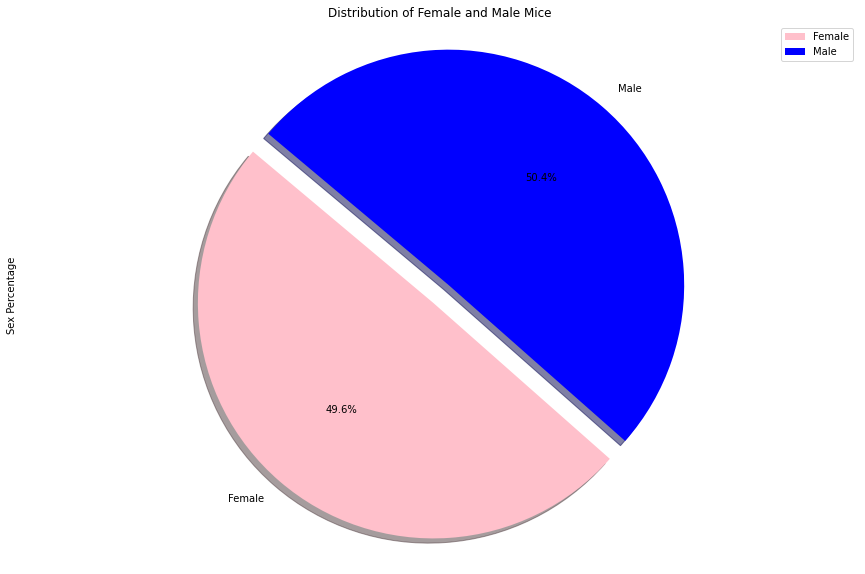

In [13]:
colors = ["Pink", "Blue"]
explode = (0.1,0)
pandas_pie = gender_of_mouse.plot.pie(y="Total Count", figsize=(15,10), colors = colors, explode = explode, startangle=140,
                                      shadow=True, autopct="%1.1f%%")

plt.title("Distribution of Female and Male Mice")
plt.ylabel("Sex Percentage")
plt.axis("equal")
plt.show()

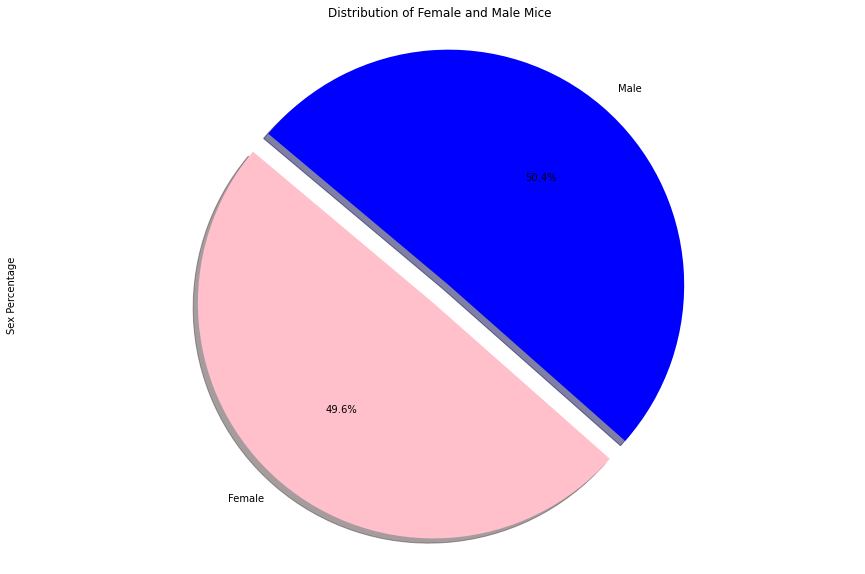

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots(figsize=(15,10))
labels = ["Female","Male"]
sizes = [49.596774, 50.403226]
colors = ["Pink", "Blue"]
explode = (0.1,0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of Female and Male Mice")
plt.ylabel("Sex Percentage")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
biggest_tumor_size = clean_mouse_data_df.groupby("Mouse ID").max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combining_tumor_volume = biggest_tumor_size[["Mouse ID", "Timepoint"]].merge(clean_mouse_data_df, on=["Mouse ID", "Timepoint"], how="outer")
combining_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
1875,z969,20,Naftisol,Male,9,30,57.898778,2
1876,z969,25,Naftisol,Male,9,30,63.145652,2
1877,z969,30,Naftisol,Male,9,30,65.841013,3
1878,z969,35,Naftisol,Male,9,30,69.176246,4


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_regimen = combining_tumor_volume.loc[combining_tumor_volume["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
ramicane_regimen = combining_tumor_volume.loc[combining_tumor_volume["Drug Regimen"]=="Ramicane"]["Tumor Volume (mm3)"]
infubinol_regimen = combining_tumor_volume.loc[combining_tumor_volume["Drug Regimen"]=="Infubinol"]["Tumor Volume (mm3)"]
ceftamin_regimen = combining_tumor_volume.loc[combining_tumor_volume["Drug Regimen"]=="Ceftamin"]["Tumor Volume (mm3)"]   

In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Determine outliers using upper and lower bounds

# Capomulin IQR, quartiles, and outliers
capomulin_quartiles = capomulin_regimen.quantile([.25,.5,.75])
lower_capomulin = capomulin_quartiles[0.25]
upper_capomulin = capomulin_quartiles[0.75]
iqr = upper_capomulin-lower_capomulin

lower_bound_capoutlier = lower_capomulin - (1.5*iqr)
upper_bound_capoutlier = upper_capomulin + (1.5*iqr)
print(f"Values below {round(lower_bound_capoutlier,2)} could be outliers.")
print(f"Values above {round(upper_bound_capoutlier, 2)} could be outliers.")

Values below 26.71 could be outliers.
Values above 55.97 could be outliers.


In [18]:
# Ramicane IQR, quartiles, and outliers
ramicane_quartiles = ramicane_regimen.quantile([.25,.5,.75])
lower_ramicane = ramicane_quartiles[0.25]
upper_ramicane = ramicane_quartiles[0.75]
iqr = upper_ramicane-lower_ramicane

lower_bound_ramoutlier = lower_ramicane - (1.5*iqr)
upper_bound_ramoutlier = upper_ramicane + (1.5*iqr)
print(f"Values below {round(lower_bound_ramoutlier,2)} could be outliers.")
print(f"Values above {round(upper_bound_ramoutlier, 2)} could be outliers.")

Values below 24.19 could be outliers.
Values above 57.49 could be outliers.


In [19]:
# Infubinol IQR, quartiles, and outliers
infubinol_quartiles = infubinol_regimen.quantile([.25,.5,.75])
lower_infubinol = infubinol_quartiles[0.25]
upper_infubinol = infubinol_quartiles[0.75]
iqr = upper_infubinol-lower_infubinol 

lower_bound_infoutlier = lower_infubinol - (1.5*iqr)
upper_bound_infoutlier = upper_infubinol + (1.5*iqr)
print(f"Values below {round(lower_bound_infoutlier,2)} could be outliers.")
print(f"Values above {round(upper_bound_infoutlier, 2)} could be outliers.")

Values below 32.31 could be outliers.
Values above 72.32 could be outliers.


In [20]:
# Ceftamin IQR, quartiles, and outliers
ceftamin_quartiles = ceftamin_regimen.quantile([.25,.5,.75])
lower_ceftamin = ceftamin_quartiles[0.25]
upper_ceftamin = ceftamin_quartiles[0.75]
iqr = upper_ceftamin-lower_ceftamin

lower_bound_cefoutlier = lower_ceftamin - (1.5*iqr)
upper_bound_cefoutlier = upper_ceftamin + (1.5*iqr)
print(f"Values below {round(lower_bound_cefoutlier,2)} could be outliers.")
print(f"Values above {round(upper_bound_cefoutlier, 2)} could be outliers.")

Values below 32.82 could be outliers.
Values above 71.19 could be outliers.


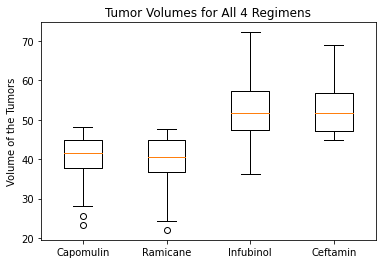

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes for All 4 Regimens")
ax1.set_ylabel("Volume of the Tumors")
ax1.boxplot([capomulin_regimen, ramicane_regimen, infubinol_regimen, ceftamin_regimen], labels=["Capomulin", "Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and Scatter Plots

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_line_plot = clean_mouse_data_df.loc[clean_mouse_data_df["Drug Regimen"]=="Capomulin"]
print(capomulin_line_plot)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

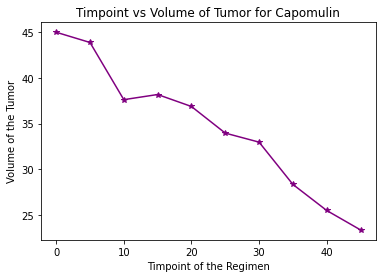

In [23]:
capomulin_mouse = clean_mouse_data_df.loc[clean_mouse_data_df["Mouse ID"]=="s185"]
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker="*", color="purple")
plt.title("Timpoint vs Volume of Tumor for Capomulin")
plt.xlabel("Timpoint of the Regimen")
plt.ylabel("Volume of the Tumor")
plt.show()

Text(0, 0.5, 'Avg Volume of the Tumor')

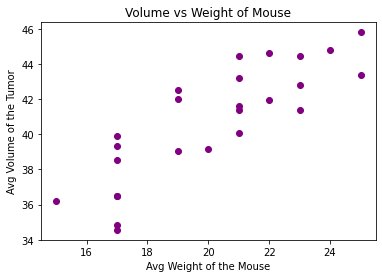

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_weight = clean_mouse_data_df.loc[clean_mouse_data_df["Drug Regimen"]=="Capomulin"]

capomulin_average_weight = capomulin_mouse_weight.groupby(["Mouse ID"]).mean()
plt.scatter(capomulin_average_weight["Weight (g)"], capomulin_average_weight["Tumor Volume (mm3)"], marker="o", facecolors="purple")

plt.title("Volume vs Weight of Mouse")
plt.xlabel("Avg Weight of the Mouse")
plt.ylabel("Avg Volume of the Tumor")

## Correlation and Regression

The r-squared is: 0.7088568047708717


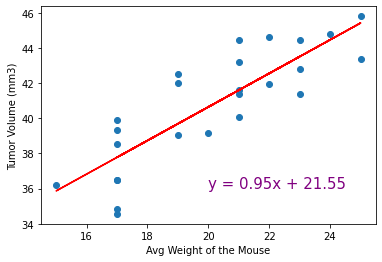

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_average_weight["Weight (g)"]
y_values = capomulin_average_weight["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="purple")
plt.xlabel('Avg Weight of the Mouse')
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()